## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


## 方法3-盒鬚圖判別法(IQR method)

In [3]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

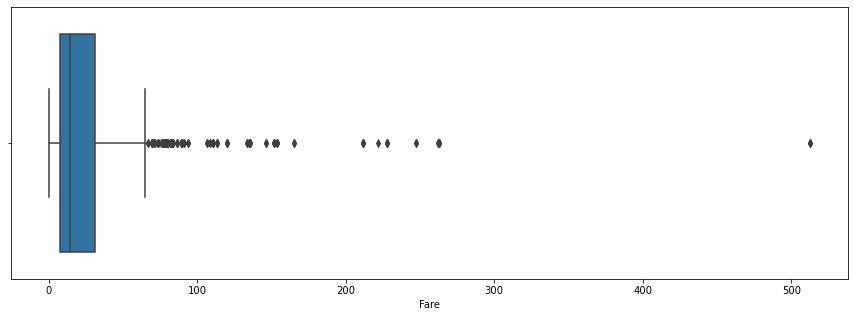

In [4]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_train, x='Fare')

In [5]:
fare_z = (df_train['Fare'] - df_train['Fare'].mean()) / df_train['Fare'].std()
fare_z[abs(fare_z) > 3]

27     4.644393
88     4.644393
118    4.332899
258    9.661740
299    4.332899
311    4.631815
341    4.644393
377    3.608038
380    3.930516
438    4.644393
527    3.814891
557    3.930516
679    9.661740
689    3.604768
700    3.930516
716    3.930516
730    3.604768
737    9.661740
742    4.631815
779    3.604768
Name: Fare, dtype: float64

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


In [6]:
df_train.iloc[np.where(fare_z > 9)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [7]:
print('雖然只有三個資料的票價為500，但看似不是異常值，應該不需做處理。')

雖然只有三個資料的票價為500，但看似不是異常值，應該不需做處理。
